In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
#I dont know wth is happening here tho I can understand the gist. Just importing the dataset
tarball_path = Path("datasets/housing.tgz")
Path("datasets").mkdir(parents=True, exist_ok=True)
url = "https://github.com/ageron/data/raw/main/housing.tgz"
urllib.request.urlretrieve(url, tarball_path)
with tarfile.open(tarball_path) as housing_tarball:
  housing_tarball.extractall(path="datasets")
house=pd.read_csv(Path("datasets/housing/housing.csv")) 

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

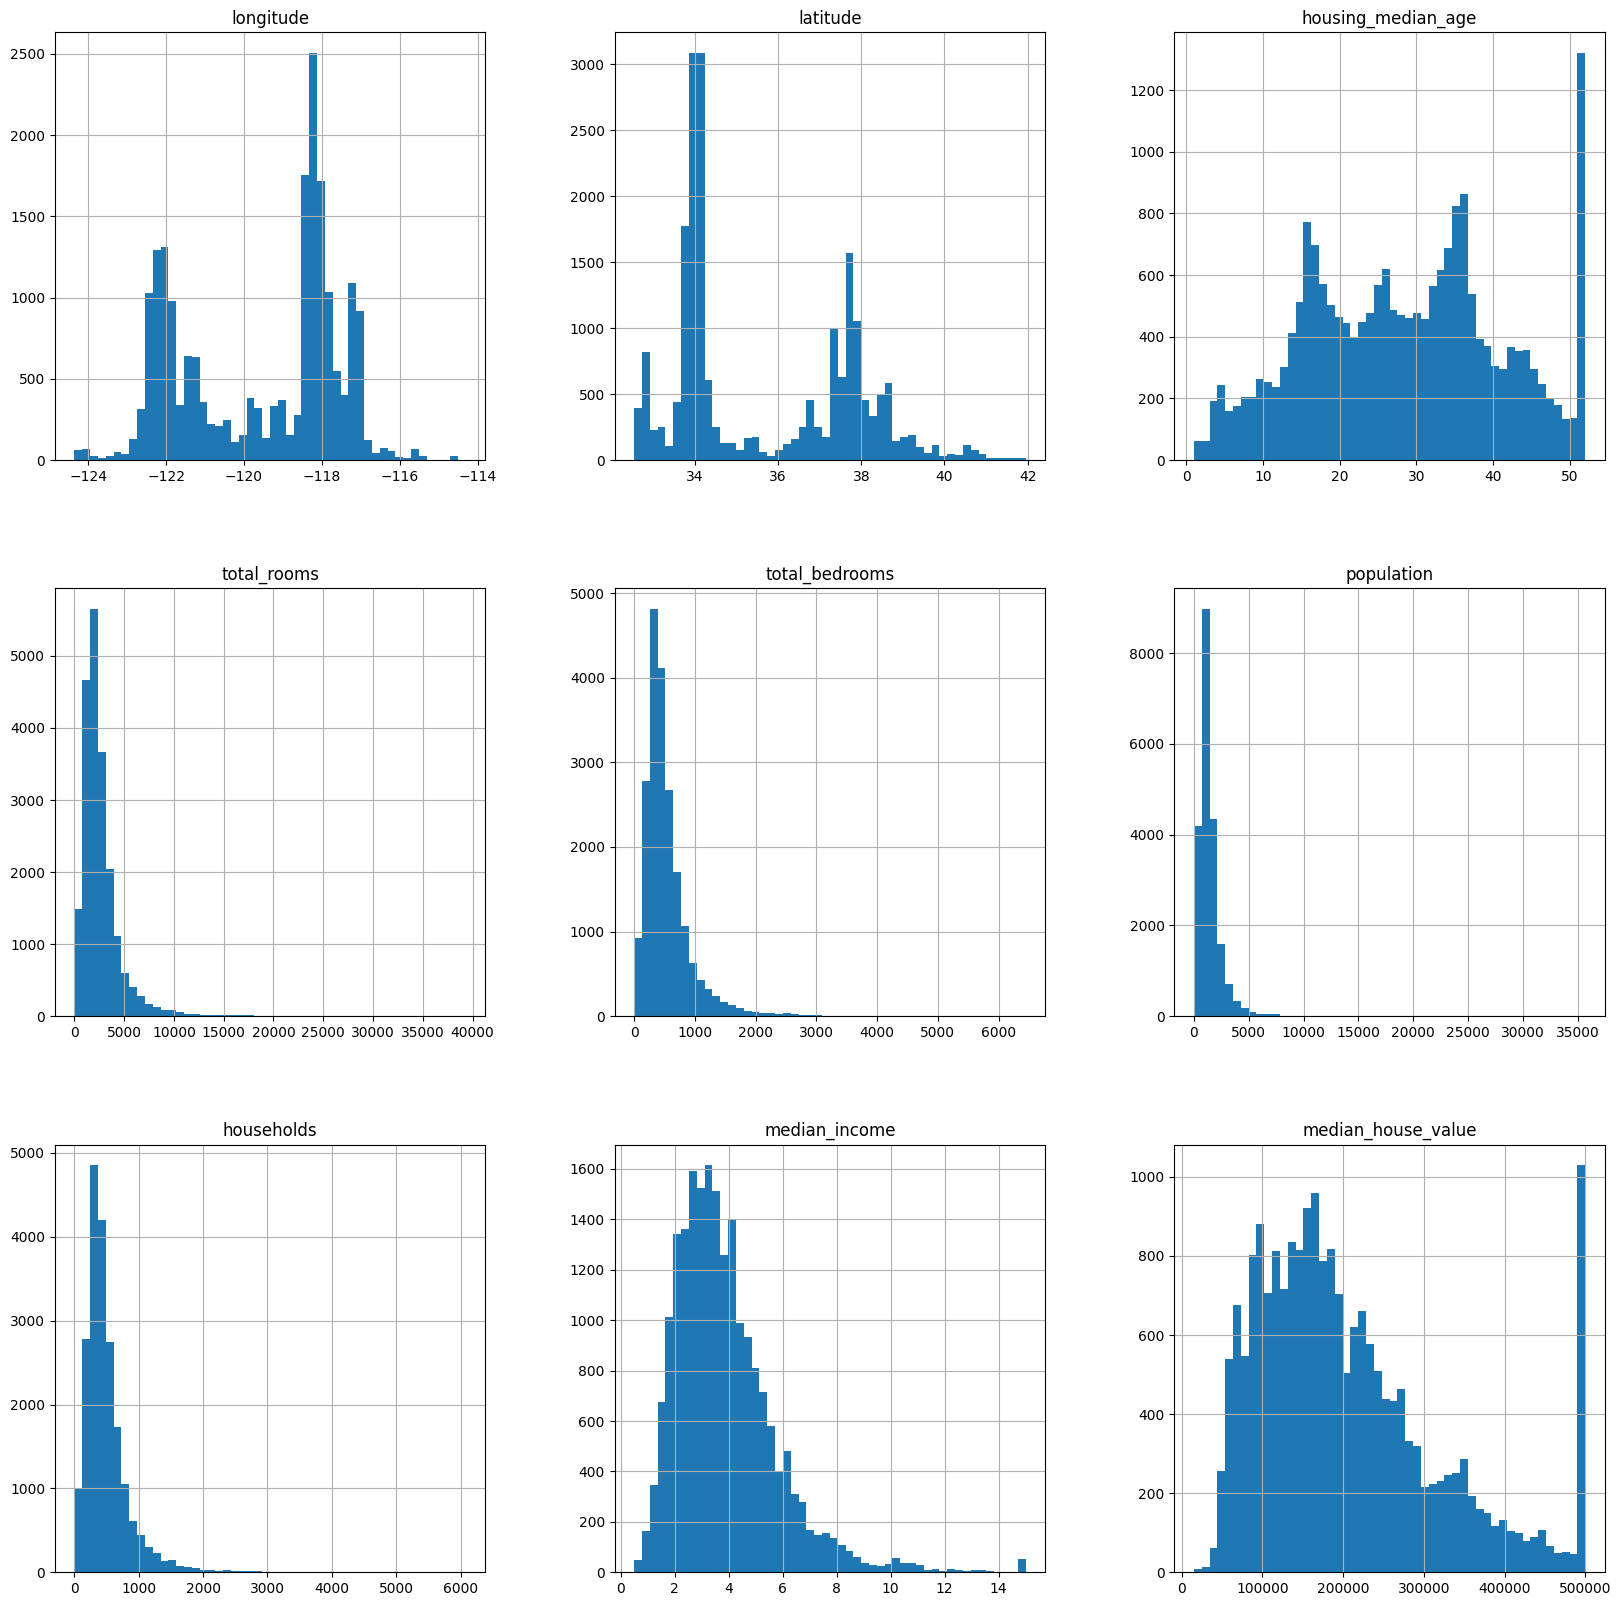

In [8]:
import matplotlib.pyplot as plt
house.hist(bins=50,figsize=(20,20))

In [9]:
#We notice that data has been 'capped' at the 15(000) upper and 0.5 lower at median income.
#Unfortunately, median house price is also capped which is ourr target variable.
#We also notice histograms are skewed right which will make it troublesmome for our model to work.
#We rather want a bell shaped curve.

In [63]:
house['total_bedroom'] = house['total_bedrooms'].fillna(house['total_bedrooms'].median())
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
bedroom_ratio         207
total_bedroom           0
dtype: int64

In [32]:
#Getting target var
X=house.drop(columns=['median_house_value','ocean_proximity'])
Y=house['median_house_value']

In [52]:
#converting continous data into catagroical for stratifing
import numpy as np
house['cat_income']=pd.cut(house['median_income'],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [53]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3,stratify=house['cat_income'])

3    7236
2    6581
4    3639
5    2362
1     822
Name: cat_income, dtype: int64


<BarContainer object of 5 artists>

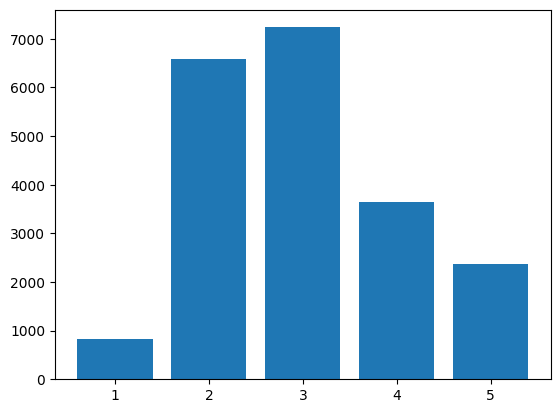

In [54]:
x=house['cat_income'].value_counts()
print(x)
plt.bar(x.index, x.values)


In [55]:
#since we wont be using cat_income again
house=house.drop(columns='cat_income',axis=1)

<Axes: xlabel='longitude', ylabel='latitude'>

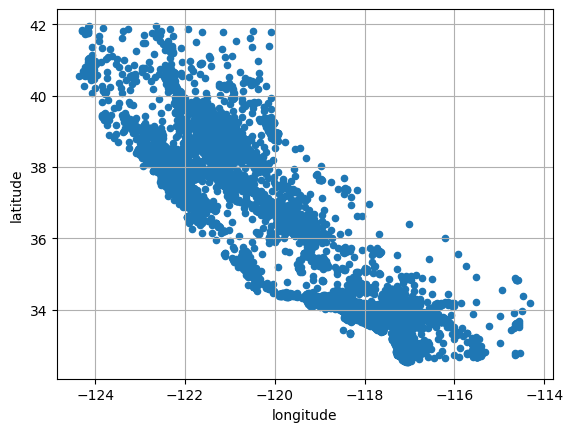

In [56]:
#Scatter plotting longitude and latitude just cos
house.plot(kind="scatter", x="longitude", y="latitude", grid=True)

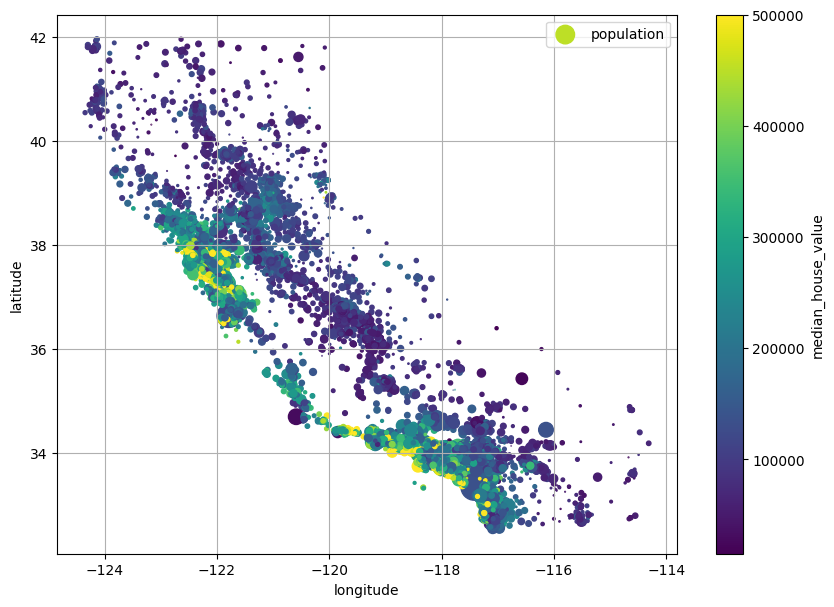

In [57]:
house.plot(kind='scatter',x='longitude',y='latitude',s=house['population']/100,c='median_house_value',label='population',colorbar=True,grid=True,figsize=(10,7))
plt.show()

In [58]:
cormatrix=house.corr()
cormatrix

<ipython-input-58-70fa6477be1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix=house.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,total_bedroom
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.092657,0.069120
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.113815,-0.066484
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.136089,-0.319026
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.187900,0.927058
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.084238,1.000000
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.035319,0.873535
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.065087,0.974366
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.615661,-0.007617
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.255880,0.049457
bedroom_ratio,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.255880,1.000000,0.084238


array([[<Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='population', ylabel='total_rooms'>,
        <Axes: xlabel='households', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='total_rooms', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>,
        <Axes: xlabel='households', ylabel='population'>,
        <Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='median_house_value', ylabel='population'>,
        <Axes: xlabel='housing_median_age', ylabel='population'>],
       [<Axes: xlabel='total_rooms', ylabel='households'>,
        <Axes: xlabel='population', ylabel='households'>,
        <Axes: xlabel='households', ylabel='households'>,
        <Axes: xlabel='median_income', ylabel='households'>,
        <Axes: xlabe

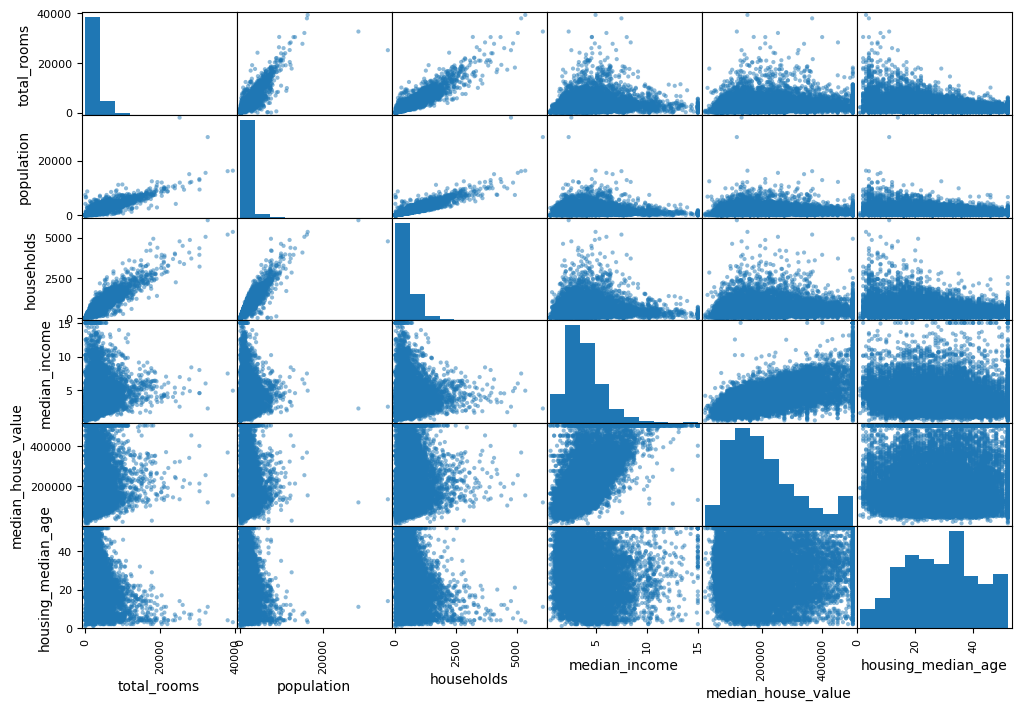

In [59]:
#we can also plot all of these
from pandas.plotting import scatter_matrix
x=['total_rooms',	'population',	'households',	'median_income',	'median_house_value', 'housing_median_age']
scatter_matrix(house[x],figsize=(12,8))

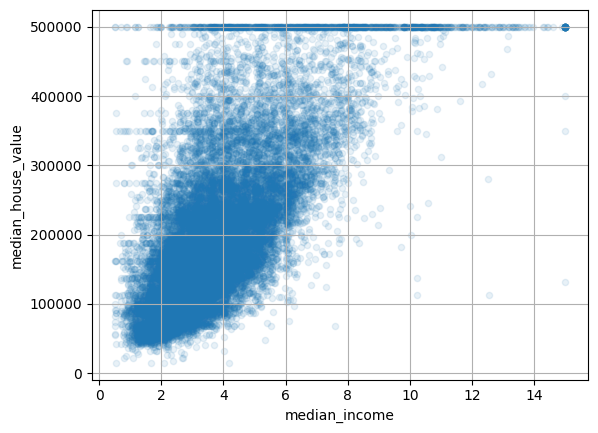

In [41]:
#We notice only median_income has a relation with median_income
house.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1, grid=True)
plt.show()


In [42]:
#The line at 500000 shows us the capping
#We can also notice a strong upwards trend in the plot
#We can also create new features
house['bedroom_ratio']=house['total_bedrooms']/house['total_rooms']

In [43]:
cor=house.corr()
cor["median_house_value"]

<ipython-input-43-a46e1ec835f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=house.corr()


longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
bedroom_ratio        -0.255880
total_bedroom         0.049457
Name: median_house_value, dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#we use mean_sqaured_error rather than accuracy because it is a regression model, not a classification one

In [60]:
regressor=RandomForestRegressor(n_estimators=100,random_state=3)
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)

ValueError: ignored

In [50]:
X_train.isnull()

AttributeError: ignored